VGG16
Loading the classes

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
path=r'C:\Users\VICTUS\Downloads\cancer'
image=[]
cancer=[]
for j in os.listdir(path):
    if j.split('.')[-1]=='jpg':
        img=cv2.imread(os.path.join(path,j))
        img=cv2.resize(img,(200,200))
        image.append(img)
        cancer.append(j)
plt.figure(figsize=(12,8))
c=1
for i in range(0,len(image)):
    plt.subplot(3,3,c)                                    
    plt.imshow(np.array(cv2.cvtColor(image[i],cv2.COLOR_BGR2RGB)))
    plt.title(cancer[i])
    plt.axis('off')
    c+=1

<Figure size 1200x800 with 0 Axes>

Loading the Training dataset

In [4]:
path = r'C:\Users\VICTUS\Downloads\cancer'
classes = {'benign': 0, 'malignant': 1}
X = []
Y = []
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        if j.split('.')[-1]=='jpg':
            img = cv2.imread(os.path.join(pth, j))
            img = cv2.resize(img, (200, 200))
            X.append(img)
            Y.append(classes[cls])

Loading the Testing datatset

In [6]:
path = r'C:\Users\VICTUS\Downloads\cancer'
classes = {'benign': 0, 'malignant': 1}
X_test = []
Y_test = []
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        if j.split('.')[-1]=='jpg':
            img = cv2.imread(os.path.join(pth, j))
            img = cv2.resize(img, (200, 200))
            X_test.append(img)
            Y_test.append(classes[cls])

Processing Set

In [7]:
X = np.array(X)
Y = np.array(Y)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X = X.reshape(X.shape[0], 200, 200, 3)
X_test = X_test.reshape(X_test.shape[0], 200, 200, 3)
X=X.astype('float32')
X_test=X_test.astype('float32')
X/=255
X_test/=255
from tensorflow.keras.utils import to_categorical
Y, Y_test = to_categorical(Y), to_categorical(Y_test)

Splitting training dataset into training and validation

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,stratify=Y,test_size=0.2)


Custom CNN Model

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.layers import BatchNormalization, RandomFlip,RandomRotation,RandomZoom, Input
model1 = Sequential([
    Input(shape=(200,200,3)),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)])
# convolutional layer
model1.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
# convolutional layer
model1.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
# flatten output of conv
model1.add(Flatten())

# hidden layer
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))

# output layer
model1.add(Dense(2, activation='softmax'))


In [18]:
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [19]:

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 200, 200, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,528,898 (74.50 MB)

 Trainable params: 19,527,938 (74.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [20]:
history1 = model1.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_val, Y_val))


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 546ms/step - accuracy: 0.6856 - loss: 7.0807 - val_accuracy: 0.4508 - val_loss: 5.2523
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 33s 501ms/step - accuracy: 0.6960 - loss: 5.9488 - val_accuracy: 0.5455 - val_loss: 1.8236
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 524ms/step - accuracy: 0.7292 - loss: 2.4051 - val_accuracy: 0.5530 - val_loss: 1.3583
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 598ms/step - accuracy: 0.7382 - loss: 1.8986 - val_accuracy: 0.5966 - val_loss: 0.6954
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 527ms/step - accuracy: 0.7503 - loss: 1.2031 - val_accuracy: 0.7803 - val_loss: 0.4671
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 531ms/step - accuracy: 0.7592 - loss: 0.8637 - val_accuracy: 0.4943 - val_loss: 0.7285
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 33s 504ms/step - accuracy: 0.7660 - loss: 0.7121 - val_accuracy: 0.5436 - val_loss: 0.7484
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 524ms/step - accuracy: 0.7749 - loss: 0.6783 - val_accu

Text(0.5, 1.0, 'Training and Validation Loss')

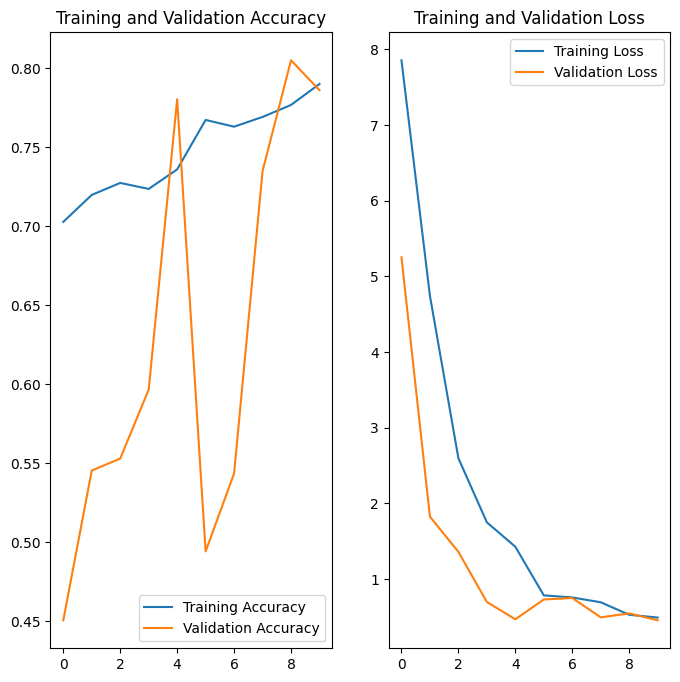

In [22]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


VGG16 model

In [23]:
from tensorflow.keras.applications import VGG16
model_vgg16 = VGG16(input_shape=(200,200,3), include_top=False, weights='imagenet')

In [24]:

for layer in model_vgg16.layers:
   layer.trainable=False
model_vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [25]:
model = Sequential()
model.add(model_vgg16)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, Y_train, batch_size=32, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.6025 - loss: 1.4408 - val_accuracy: 0.8087 - val_loss: 0.4045
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 184s 3s/step - accuracy: 0.7957 - loss: 0.4386 - val_accuracy: 0.8049 - val_loss: 0.4168
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.8035 - loss: 0.4325 - val_accuracy: 0.8295 - val_loss: 0.3775
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.8068 - loss: 0.3779 - val_accuracy: 0.8087 - val_loss: 0.4107
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.7791 - loss: 0.4403 - val_accuracy: 0.8258 - val_loss: 0.3641
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.8362 - loss: 0.3823 - val_accuracy: 0.7955 - val_loss: 0.4089
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.7762 - loss: 0.4325 - val_accuracy: 0.8049 - val_loss: 0.4147
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.7979 - loss: 0.3989 - val_accuracy: 0.8163 - v

Text(0.5, 1.0, 'Training and Validation Loss')

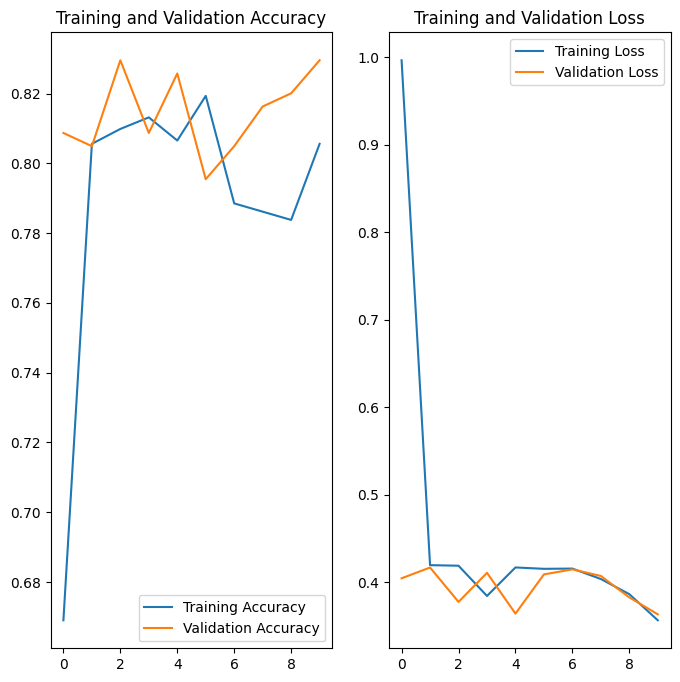

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

[0. 1.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
According to custom-CNN this image most likely belongs to Malignant 
According to VGG16 this image most likely belongs to Malignant 


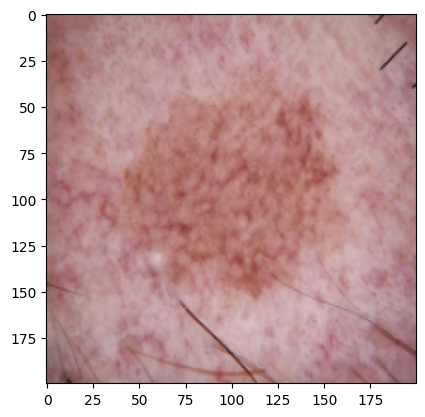

In [28]:
import tensorflow as tf
import random
class_names=['Benign','Malignant']
number=random.randint(0,X_test.shape[0])
img_array=np.expand_dims(X_test[number], axis=0)
print(Y_test[number])
predictions = model1.predict(img_array)
score = tf.nn.softmax(predictions[0])
predictions = model.predict(img_array)
score1 = tf.nn.softmax(predictions[0])
plt.imshow(np.array(cv2.cvtColor(X_test[number],cv2.COLOR_BGR2RGB)))
print(
    "According to custom-CNN this image most likely belongs to {} "
    .format(class_names[np.argmax(score)]))
print(
    "According to VGG16 this image most likely belongs to {} "
    .format(class_names[np.argmax(score1)]))

In [30]:
y_pred1=model.predict(X_test)
y_pred_classes = np.argmax(y_pred1, axis=1)
y_pred_classes1=np.argmax(y_pred1, axis=1)
y_true = np.argmax(Y_test, axis=1)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
conf_matrix1 = confusion_matrix(y_true, y_pred_classes1)
print('Custom CNN:\n',conf_matrix)
print('VGG16:\n',conf_matrix1)


83/83 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step
Custom CNN:
 [[1239  201]
 [ 138 1059]]
VGG16:
 [[1239  201]
 [ 138 1059]]


In [31]:
from sklearn.metrics import classification_report
print('Custom CNN:\n',classification_report(y_true, y_pred_classes))
print('VGG16:\n',classification_report(y_true, y_pred_classes1))

Custom CNN:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1440
           1       0.84      0.88      0.86      1197

    accuracy                           0.87      2637
   macro avg       0.87      0.87      0.87      2637
weighted avg       0.87      0.87      0.87      2637

VGG16:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1440
           1       0.84      0.88      0.86      1197

    accuracy                           0.87      2637
   macro avg       0.87      0.87      0.87      2637
weighted avg       0.87      0.87      0.87      2637



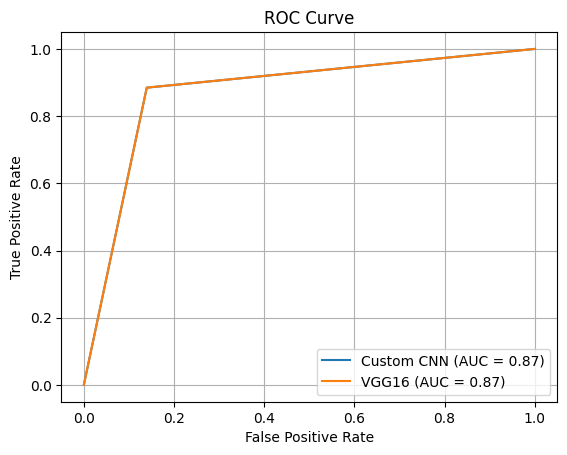

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_model1, tpr_model1, _ = roc_curve(y_true, y_pred_classes)
roc_auc_model1 = roc_auc_score(y_true, y_pred_classes)
fpr_model2, tpr_model2, _ = roc_curve(y_true, y_pred_classes1)
roc_auc_model2 = roc_auc_score(y_true, y_pred_classes1)
plt.plot(fpr_model1, tpr_model1, label='Custom CNN (AUC = {:.2f})'.format(roc_auc_model1))
plt.plot(fpr_model2, tpr_model2, label='VGG16 (AUC = {:.2f})'.format(roc_auc_model2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()